# Decision trees and random forests

Decision trees build classification or regression models in the form of a tree structure. Creating a binary decision tree is a process of dividing up the input space. A greedy and recursive approach is used to recursively create binary splits in the input space. At each step, all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner as the optimal split point is chosen in each step without checking for whether or not the split will lead to the lowest possible cost several levels down. 

In order to make a prediction for a given observation, we typically use the mean (regression) or the mode (classification) of the training observations in the region to which the observation belongs. 

### Classification using decision trees

1. Import the make_moons dataset from sklearn using $100$ samples, noise $= 0.25$ and a fixed random state = $10$.
2. Fit and visualize a decision tree classifier after setting the maximum depth of nodes as $6$. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. 
3. Comment on the interpretability of decision trees.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure 
figure(figsize=(15,15))

<Figure size 1500x1500 with 0 Axes>

In [63]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
        


In [2]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

In [90]:
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 53)

In [91]:
model_tree = DecisionTreeClassifier(max_depth = 6)

In [92]:
model_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

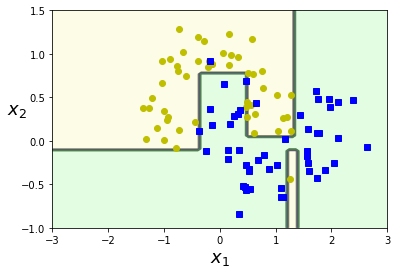

In [94]:
plot_decision_boundary(model_tree, X, y, axes = [-3,3, -1,1.5])

- We could have done a better job in interpreting the data with lesser splits, as some of the splits are redundant which may lead to overfitting.

### Overfitting in decision tree classifiers

1. Fit another decision tree classifier on the dataset used above, with no restrictions on the model hyperparameters. Plot the decision boundaries and comment on your observations regarding the overfitting tendency of decision tree classifiers.
2. List and explain in a line or two some of the regularization hyperparameters used while building a decision tree and why they might help reduce overfitting of a decision tree model.
3. Now fit a decision tree classifier on the same dataset using the min_samples_leaf hyperparameter set to $4$. Plot the decision boundaries and compare with the model fit in (1). Which model ($1$ vs $3$) do you think will generalize better to the test dataset? 

In [103]:
model_tree2 = DecisionTreeClassifier()
model_tree2.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

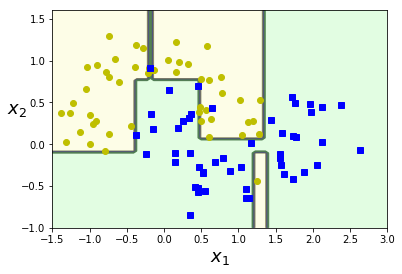

In [104]:
plot_decision_boundary(model_tree2, X, y, axes = [-1.5,3, -1,1.6])

The decision tree model tends to overfit as the number of splits increases as you can see from the plot it seperates outliers into seperate region. 

- Decreasing the max depth can reduce the overfitting as it decreases the number of splits. 
- increasing min samples leaf reduces overfitting as it specifies the minimum number of samples present in both the sides of the split. As you can see in model3 decision boundary that the outliers single point region has been removed because the min samples leaf is 4.

In [105]:
model_tree3 = DecisionTreeClassifier(min_samples_leaf = 4)
model_tree3.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

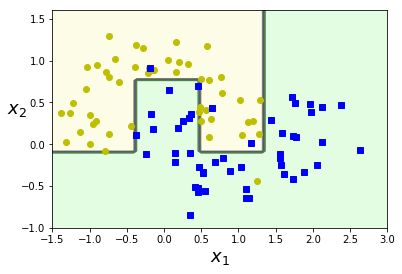

In [107]:
plot_decision_boundary(model_tree3, X, y, axes = [-1.5, 3, -1, 1.6])

- model3 generalizes the data better than model1. Hence model3 will perform better on test dataset than model1.

### Instability of decision trees

1. Generate 100 points ($[x1, x2]$) in the 2D plane using np.random.rand() for $(-0.5)<x1<0.5$ and $(-0.5)<x2<0.5$ .  
2. Assign a label of $1$ to all points having $x1>0.0$ and $0$ otherwise. The dataset can now be easily classified using a straight line parallel to the $x2$ axis. 
3. Fit a decision tree classifier on the above obtained dataset ($D1$) and plot the decision boundary.
4. Now rotate the dataset by $45^{\circ}$in the $[x1,x2]$ plane by suitably multiplying the $100$ points by a rotation matrix.
5. Fit a decision tree classifier on the above obtained dataset ($D2$) and plot the decision boundary.
6. The two datasets obtained above are essentially rotated versions of each other. Comment on the changed decision boundaries of the fit decision trees. Although both the decision trees fit the training datset (D1 and D2) perfectly, which decision tree do you think will generalize better on the test dataset?
7. Conclude about the sensitivity of decision trees to rotation of training data and give reasons for the same.
8. Mention one technique that can result in a better orientation of the training dataset.

In [108]:
data = np.random.rand(100,2)

In [114]:
data[:,0] = data[:,0] - 0.5
data[:,1] = data[:,1] - 0.5

In [123]:
y = []
for i in range(data.shape[0]):
    if data[i,0] > 0.0:
        y.append(1)
    else:
        y.append(0)
y = np.array(y)

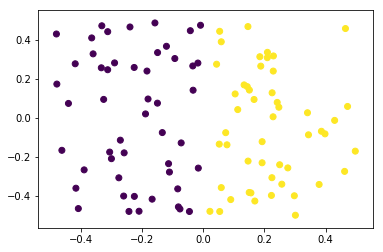

In [128]:
plt.scatter(data[:,0], data[:,1], c = y)

In [129]:
model_tree_D = DecisionTreeClassifier()
model_tree_D.fit(data, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

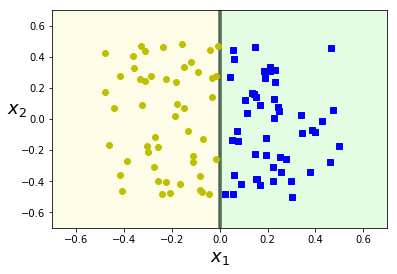

In [133]:
plot_decision_boundary(model_tree_D, data, y, axes = [-0.7,0.7,-0.7,0.7])

In [134]:
r_mat = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])

In [135]:
r_data = np.matmul(data, r_mat)

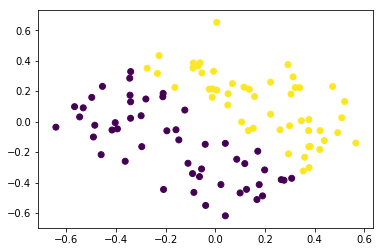

In [136]:
plt.scatter(r_data[:,0], r_data[:,1], c = y)

In [137]:
model_tree_D2 = DecisionTreeClassifier()
model_tree_D2.fit(r_data, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

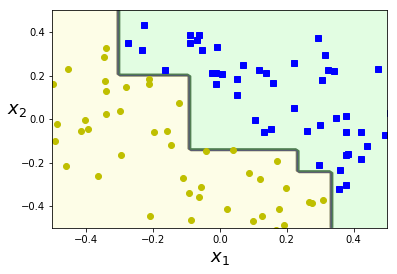

In [138]:
plot_decision_boundary(model_tree_D2, r_data, y, axes = [-0.5,0.5,-0.5,0.5])

- The decision boundary appears to be in a zig zag pattern for the rotated data. Even though in both cases the decision tree fits the data perfectly the first model generalizes the data better as it is aligned to the axis. 
- The decision tree classifier cannot perfectly interpret the decision boundary if the data is rotated as the splits are orthogonal the aligned axes. So if the decision boundary is not aligned to the axes it will follow a zig zag pattern around the rotated decision boundary.
- Rotate the axes in such a way that it aligns along the principle directions.

### Linear classifiers vs decision tree classifiers

1. Taking into account the fact that all decision boundary splits are perpendicular to the input axes, give an example of a dataset where : <br>
a. The linear classifier outperforms the decision tree classifier <br> 
b. The decision tree classifier outperforms the linear classifier <br>
For ease of visualizing, your datasets can contain 2D points having two labels : $0$ and $1$. Plot the points such that all points having the same label are of the same colour.


- The linear classifier outperform a decision tree classifier when the decision boundary is not aligned to the axes.

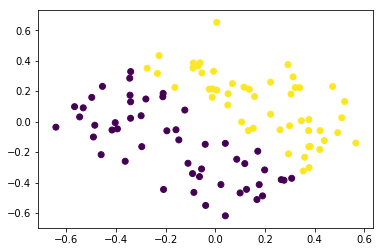

In [140]:
plt.scatter(r_data[:,0], r_data[:,1], c = y)

In [141]:
data = []
target = []
data0 = np.linspace(0,1,10)
data1 = np.linspace(0,1,10)
for x in data0:
    for y in data1:
        data.append([x, y])
        target.append(0)
        data.append([x,-y])
        target.append(1)
        data.append([-x,-y])
        target.append(0)
        data.append([-x,y])
        target.append(1)
        
data = np.array(data)
target = np.array(target)

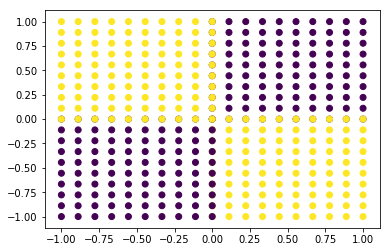

In [142]:
plt.scatter(data[:,0], data[:,1], c = target)

### Regression using decision trees

1. Train a regression tree on the noisy quadratic dataset given below with three different max_depth values : $2, 3$ and $4$.
2. Plot the divisions of the input space and the predicted value in each division of the input space using the helper function plot_regression_predictions provided to you below for each regression tree model in (1).

In [144]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

#Quadratic + noise training set 
np.random.seed(10)
X = np.random.rand(150, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(150, 1) / 10

In [145]:
from sklearn.tree import DecisionTreeRegressor

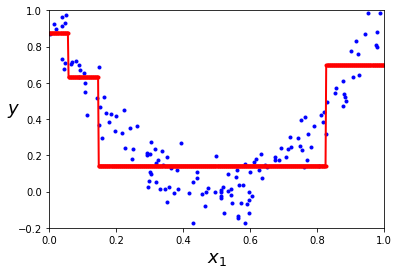

In [146]:
model_reg1 = DecisionTreeRegressor(max_depth = 2)
model_reg1.fit(X, y)
plot_regression_predictions(model_reg1, X, y)

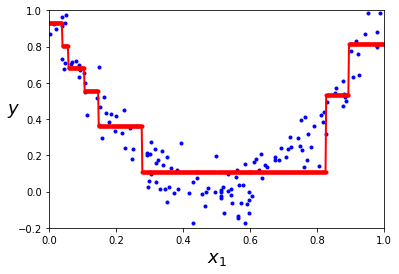

In [147]:
model_reg2 = DecisionTreeRegressor(max_depth = 3)
model_reg2.fit(X, y)
plot_regression_predictions(model_reg2, X, y)

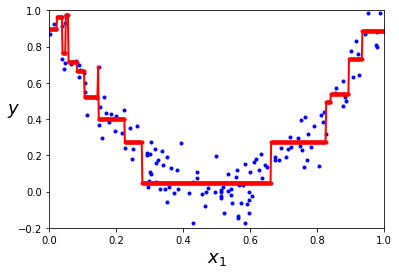

In [148]:
model_reg3 = DecisionTreeRegressor(max_depth = 4)
model_reg3.fit(X, y)
plot_regression_predictions(model_reg3, X, y)

### Overfitting in regression trees

1. Fit another regression tree on the dataset used above, with no restrictions on the regularization hyperparameters of the model. Plot the predicted value in all input space divisions.
2. What do you observe? Do regression trees too have a tendency to overfit if no regularization is applied? 
3. Now fit a regression tree on the same dataset using the min_samples_leaf hyperparameter set to $10$. Plot the predicted value in all input space divisions and compare with the model fit in (1). Which model ($1$ vs $3$) do you think will generalize better to the test dataset? 

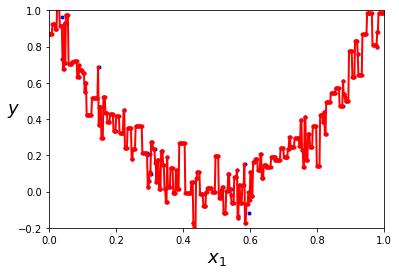

In [149]:
model_reg4 = DecisionTreeRegressor()
model_reg4.fit(X, y)
plot_regression_predictions(model_reg4, X, y)

- The decision overfits the data. The decision tree splits the in such a way that all the final terminal nodes obtain must be pure.So they have a tendency to overfit if no regularization is applied.

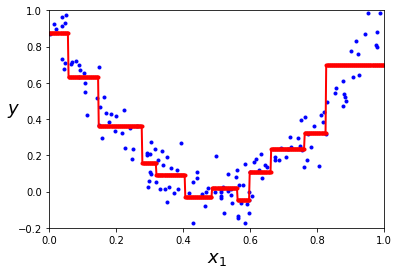

In [150]:
model_reg5 = DecisionTreeRegressor(min_samples_leaf = 10)
model_reg5.fit(X, y)
plot_regression_predictions(model_reg5, X, y)

- The final model generalizes the data far better than model1.

### Fine-tuning a decision tree 

1. Generate a moons dataset using make_moons (n_samples=$10000$, noise=$0.4$). 
2. Split it into a training set and a test set. 
3. Use grid search with cross-validation (with the help of GridSearchCV) to find good hyperparameter values for max_leaf_nodes and min_samples_split. Try values ranging from $2$ to $30$ for max_leaf_nodes and $2$ to $6$ for min_samples_split. Report the optimal hyperparameter values.
4. Train the decision tree classifier on the full training set using these optimal hyperparameters, and report your model's performance on the test set.

In [5]:
X, y = make_moons(n_samples = 1000, noise = 0.4)

In [6]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

In [159]:
from sklearn.model_selection import GridSearchCV
params = [{'max_leaf_nodes': np.linspace(2, 30,29).astype('int') , 'min_samples_split': [2,3,4,5,6]}]

In [160]:
clf = GridSearchCV(DecisionTreeClassifier(), params, cv = 5)
clf.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'min_samples_split': [2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [161]:
clf.best_params_

{'max_leaf_nodes': 7, 'min_samples_split': 2}

In [165]:
best_model = DecisionTreeClassifier(max_leaf_nodes = 7, min_samples_split = 2)
best_model.fit(Xtrain, ytrain)
print(best_model.score(Xtest, ytest))

0.84


### Growing a random forest classifier

1. Continuing the previous exercise, generate $1,000$ subsets of the training set, each containing 100 instances selected randomly. You can use sklearn.model_selection.ShuffleSplit for this. Contrary to other cross-validation strategies, random splits in ShuffleSplit do not guarantee that all folds will be different.
2. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set created in ($2$) of the previous problem. How do you expect these decision trees to perform as compared to the first decision tree? Give reasons. Report the mean of accuracy scores of the 1000 trees.
3. For each test set instance, generate the predictions of the $1,000$ Decision Trees, and keep only the most frequent prediction. This gives you majority-vote predictions over the test set.
4. Evaluate these predictions on the test set and report the change in accuracy change as compared to that of the single decision tree.  

In [3]:
from sklearn.model_selection import ShuffleSplit

In [14]:
split = ShuffleSplit(n_splits = 1000, train_size = 1/8)

C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
split.get_n_splits(Xtrain)

1000

In [19]:
sum_scores = 0
for train_index, test_index in split.split(Xtrain):
    model = DecisionTreeClassifier(max_leaf_nodes = 7, min_samples_split = 2)
    model.fit(Xtrain[train_index], ytrain[train_index])
    sum_scores += model.score(Xtrain[train_index], ytrain[train_index])
    
print(sum_scores/1000)

0.9208699999999969


- Averaging diferent models decreases the bias of estimation as we are looking at different kinds of splits. That is why we could see an increase in the accuracy. Hence it performs better that the single decision tree.

In [27]:
majority_vote = np.zeros((Xtest.shape[0], 1))

for train_index, test_index in split.split(Xtrain):
    model = DecisionTreeClassifier(max_leaf_nodes = 7, min_samples_split = 2)
    model.fit(Xtrain[train_index], ytrain[train_index])
    predictions = model.predict(Xtest)
    predictions = np.reshape(predictions, (Xtest.shape[0], 1))
    majority_vote = majority_vote + predictions
    
    
majority_vote = majority_vote/1000
print(majority_vote.shape)
final_predictions = np.rint(majority_vote)

(200, 1)


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(final_predictions, ytest)

0.895

- the predictions test accuracy is better than that of single decision tree.